<a href="https://colab.research.google.com/github/mbastian2/2024-50-yd-Fgs/blob/main/50yd_Fgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install/Import

In [1]:
!pip install --upgrade nfl_data_py
!pip install adjustText
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from adjustText import adjust_text
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
schedule = nfl.import_schedules([2024])
game_count = schedule.loc[schedule['result'].notna(), 'game_id'].nunique()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.4 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.11.0 requires pandas>=2.1, but you have pandas 1.5.3 which i

#Merge/Filter

In [2]:
yearly_results = {}
for year in range(1999, 2025):
    try:
        pbp = nfl.import_pbp_data([year])
        pbp = pbp[['field_goal_result', 'kick_distance', 'play_type', 'fixed_drive_result']]
        pbp = pbp[pbp['play_type'] == 'field_goal']
        pbp = pbp[pbp['kick_distance'] >= 50]
        pbp = pbp[
          (pbp['fixed_drive_result'].isin(['Missed field goal', 'Field goal'])) |
          ((pbp['fixed_drive_result'] == 'Opp touchdown') & (pbp['field_goal_result'] == 'blocked'))
        ]
        pbp = pbp[['field_goal_result', 'kick_distance']]
        fg = pbp.groupby(['field_goal_result']).size()
        fg['attempts'] = fg.get('made', 0) + fg.get('missed', 0) + fg.get('blocked')
        fg['percent_made'] = (fg['made'] / fg['attempts']) * 100
        yearly_results[year] = fg
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

year_2024 = yearly_results[2024]
attempts_per_game = year_2024['attempts'] / game_count
makes_per_game = year_2024['made'] / game_count
total_attempts_2024 = attempts_per_game * 285
total_makes_2024 = makes_per_game * 285
yearly_results[2024]['attempts'] = total_attempts_2024
yearly_results[2024]['made'] = total_makes_2024
yearly_results[2024]['percent_made'] = (total_makes_2024 / total_attempts_2024) * 100
yearly_results

1999 done.
Downcasting floats.
2000 done.
Downcasting floats.
2001 done.
Downcasting floats.
2002 done.
Downcasting floats.
2003 done.
Downcasting floats.
2004 done.
Downcasting floats.
2005 done.
Downcasting floats.
2006 done.
Downcasting floats.
2007 done.
Downcasting floats.
2008 done.
Downcasting floats.
2009 done.
Downcasting floats.
2010 done.
Downcasting floats.
2011 done.
Downcasting floats.
2012 done.
Downcasting floats.
2013 done.
Downcasting floats.
2014 done.
Downcasting floats.
2015 done.
Downcasting floats.
2016 done.
Downcasting floats.
2017 done.
Downcasting floats.
2018 done.
Downcasting floats.
2019 done.
Downcasting floats.
2020 done.
Downcasting floats.
2021 done.
Downcasting floats.
2022 done.
Downcasting floats.
2023 done.
Downcasting floats.
2024 done.
Downcasting floats.


{1999: field_goal_result
 blocked          3.000000
 made            42.000000
 missed          40.000000
 attempts        85.000000
 percent_made    49.411765
 dtype: float64,
 2000: field_goal_result
 blocked          2.000000
 made            38.000000
 missed          28.000000
 attempts        68.000000
 percent_made    55.882353
 dtype: float64,
 2001: field_goal_result
 blocked          1.000000
 made            39.000000
 missed          36.000000
 attempts        76.000000
 percent_made    51.315789
 dtype: float64,
 2002: field_goal_result
 blocked          3.000000
 made            45.000000
 missed          38.000000
 attempts        86.000000
 percent_made    52.325581
 dtype: float64,
 2003: field_goal_result
 blocked          3.000000
 made            48.000000
 missed          47.000000
 attempts        98.000000
 percent_made    48.979592
 dtype: float64,
 2004: field_goal_result
 blocked          2.000000
 made            54.000000
 missed          36.000000
 attempts

#Plot

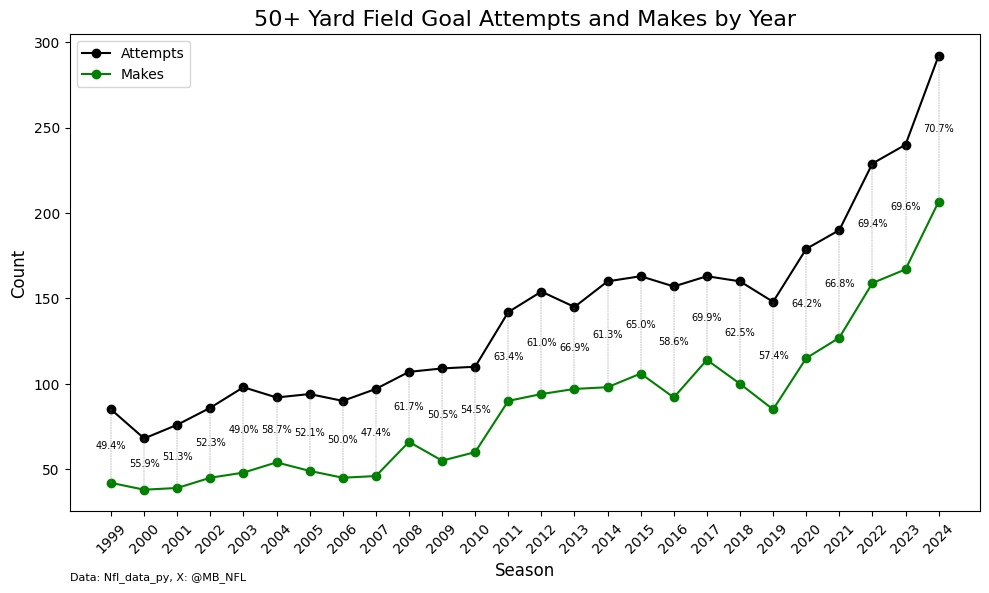

In [3]:
#Merge and Filter
years = list(yearly_results.keys())
attempts = [yearly_results[year]['attempts'] for year in years]
made = [yearly_results[year].get('made', 0) for year in years]
percent_made = [yearly_results[year].get('percent_made', 0) for year in years]

#Create Graph
plt.figure(figsize=(10, 6))
plt.plot(years, attempts, label='Attempts', marker='o', color='black')
plt.plot(years, made, label='Makes', marker='o', color='g')
plt.title('50+ Yard Field Goal Attempts and Makes by Year', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(False)
plt.xticks(years, rotation=45)
plt.tight_layout()

#Annotate Graph
for i, year in enumerate(years):
    plt.vlines(x=year, ymin=made[i], ymax=attempts[i], colors='gray', linestyles='dashed', lw=0.35)
    plt.text(year, (made[i] + attempts[i]) / 2, f"{percent_made[i]:.1f}%",
             horizontalalignment='center', verticalalignment='center', fontsize=7, color='black')

plt.text(0, -0.15, 'Data: Nfl_data_py, X: @MB_NFL', ha='left', va='bottom', fontsize=8, transform=plt.gca().transAxes)
plt.show()